## Quantum Pratical Assignment
----
### Grupo 23
### Elementos:
* a87982 Bruna Dias Carvalho
* a82124 Maria Luísa Faria Silva
----

## Conteúdo

&nbsp;

1. [Algoritmo de Procura](#ga) 
2. [Simulação de Ruído](#noise)
3. [Execução em Computador Quântico](#comp)
4. [IGNIS](#ignis)

In [1]:
# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_state_hinton

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = 23 % 8
print(s)

7


In [3]:
wb = bin(s)[2:] 

print(wb)

111


In [4]:
x = len(wb)
print('number of qubits: ', x)

number of qubits:  3


Primeiro começamos por criar os qubits necessário para representar o nosso número, ou seja, $x$ qubits

In [5]:
qr_x = QuantumRegister(x, 'x')
backend = Aer.get_backend("qasm_simulator")

cr=ClassicalRegister(x,'cr')
qc_Grover= QuantumCircuit(qr_x,cr)

## Algoritmo <a id ='ga'></a>

Este algoritmo de procura(_Grover's Algorithm_) numa lista não ordenada encontra-se dividido em 3 fases, inicialização, _oracle_ e amplificação.



Inicialização do sistema com a mesma amplitude em todos os _input states_ possíveis

$$ \sum_{x_i} \lvert x_i \rangle$$




In [6]:
# Init
qc_Grover.h(0)
qc_Grover.h(1)
qc_Grover.h(2)

Aplica  $\sqrt{N}$ vezes a seguinte operação:

_Quantum Oracle operator_ $U_w$.  Este operador é responsável por identificar a solução para o problema e indicar o objetivo.

$$-\alpha_m \lvert x_m \rangle + \beta \sum_{x_i \neq x_m}\lvert x_i \rangle$$ 

Com esta implementação, a fase do estado ($f(x_m) = 1$) roda $\pi$ radians, enquanto os outros estados não sofrem alterações.

In [7]:
import math as m

times= round(m.sqrt(2**x))
print(times)

3


Posteriormente, aplicamos um _diffuser_ com intuito de uma amplificação, ou seja, para que a probabilidade do $x_m$ aumente e as dos outros estados diminuam.

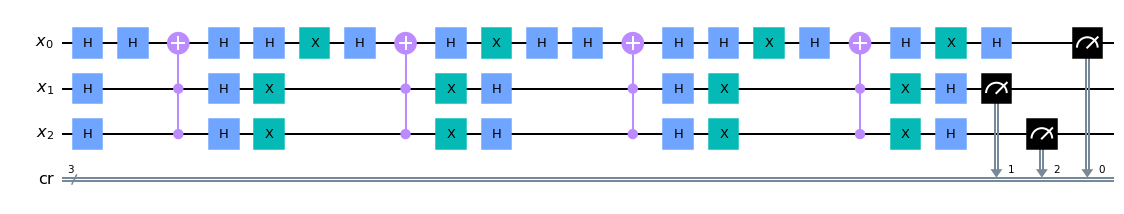

In [8]:
def select_w(circuit, qr_x):
    # Estamos à procura do estado |111>
    # Logo não é preciso aplicar x
    pass
    
def phase_oracle(circuit, qr_x):
    select_w(circuit, qr_x)
    circuit.h(0)
    circuit.ccx(2, 1, 0)
    circuit.h(0)
    select_w(circuit, qr_x)

def diffuser(circuit, qr_x):
    circuit.h(qr_x)
    circuit.x(qr_x)
    
    circuit.h(0)
    circuit.ccx(2, 1, 0)
    circuit.h(0)
    
    circuit.x(qr_x)
    circuit.h(qr_x)
    
#oracle and diffuser 
for t in range(2):
    # phase oracle 2 
    phase_oracle(qc_Grover, qr_x)
    # diffuser
    diffuser(qc_Grover,qr_x)

qc_Grover.measure(qr_x,cr)


qc_Grover.draw(output='mpl')

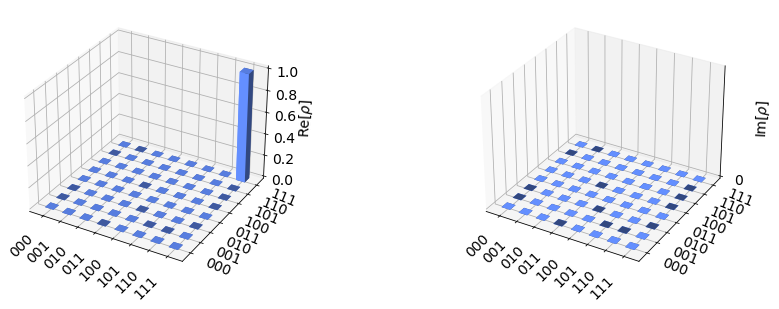

In [9]:
backend_state = Aer.get_backend('statevector_simulator') # the device to run on
result = execute(qc_Grover, backend_state).result()
psi1  = result.get_statevector(qc_Grover)
plot_state_city(psi1)

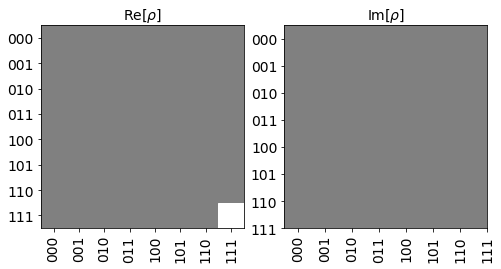

In [10]:
plot_state_hinton(psi1)

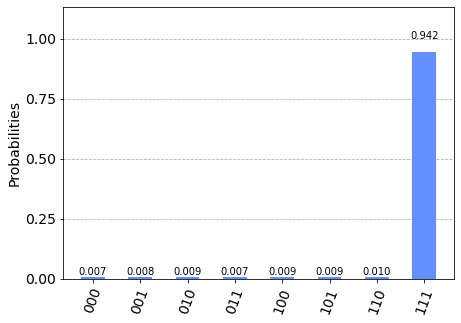

In [11]:
backend_state = Aer.get_backend('qasm_simulator') # the device to run on
shots=1024
result = execute(qc_Grover, backend, shots=shots).result()
counts_sim = result.get_counts(qc_Grover)
plot_histogram(counts_sim)

In [12]:
qc_Grover.depth()

22

# Simulação de Ruído <a id ='noise'></a>

Para poder utilizar o simulador de ruído, é necessário recorrer a computadores quânticos verdadeiros, e como tal necessitamos de carregar o IBMQ utilizando a nossa chave. 

In [13]:
IBMQ.save_account('778d50a1f7e64f3d7b4ceb3066c93fed50414df05f8cc64e7cf0f9f554ab4ecab577381ff9759a6dbc272e2474be4703fea5335f791445e6084f7a0e45e41d26')

configrc.store_credentials:WARNING:2021-06-06 23:23:56,171: Credentials already present. Set overwrite=True to overwrite.


In [14]:
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [15]:
import qiskit.tools.jupyter
%qiskit_backend_overview

Analisando as propriedades dos diferentes _backends_, e sabendo que precisamos no mínimo de 3 qubits optamos por escolher o backend _ibmq_16_melbourne_ por terem valores baixos de _AVG T1/T2_, de modo a que os _qubits_ percam as suas propriedades quânticas mais rapidamente, e o número de _jobs_ pendentes não ser muito elevado.

In [16]:
my_provider_ibmq = IBMQ.get_provider(hub='ibm-q', group='open', project='main') 

# Define backend
backend_device = my_provider_ibmq.get_backend('ibmq_16_melbourne')

In [17]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [18]:
coupling_map = backend_device.configuration().coupling_map

In [19]:
from qiskit.providers.aer.noise import NoiseModel

In [20]:
noise_model = NoiseModel.from_backend(backend_device)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['sx', 'measure', 'x', 'id', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('id', [5]), ('id', [6]), ('id', [7]), ('id', [8]), ('id', [9]), ('id', [10]), ('id', [11]), ('id', [12]), ('id', [13]), ('id', [14]), ('sx', [0]), ('sx', [1]), ('sx', [2]), ('sx', [3]), ('sx', [4]), ('sx', [5]), ('sx', [6]), ('sx', [7]), ('sx', [8]), ('sx', [9]), ('sx', [10]), ('sx', [11]), ('sx', [12]), ('sx', [13]), ('sx', [14]), ('x', [0]), ('x', [1]), ('x', [2]), ('x', [3]), ('x', [4]), ('x', [5]), ('x', [6]), ('x', [7]), ('x', [8]), ('x', [9]), ('x', [10]), ('x', [11]), ('x', [12]), ('x', [13]), ('x', [14]), ('cx', [14, 0]), ('cx', [0, 14]), ('cx', [14, 13]), ('cx', [13, 14]), ('cx', [6, 8]), ('cx', [8, 6]), ('cx', [5, 9]), ('cx', [9, 5]), ('cx', [4, 10]), ('cx', [10, 4]), ('cx', [11, 3]), ('cx', [3, 11

In [21]:
basis_gates = noise_model.basis_gates

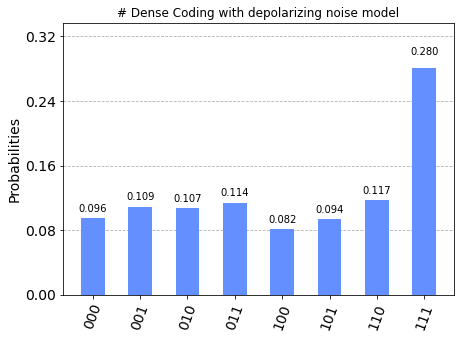

In [22]:
result_noise = execute(qc_Grover, backend, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()

counts_noise = result_noise.get_counts(qc_Grover)
plot_histogram(counts_noise, title="# Dense Coding with depolarizing noise model")

# Execução em Computador Quântico <a id ='comp'></a>

In [23]:
# Backend overview
import qiskit.tools.jupyter
provider = IBMQ.load_account()
provider.backends()
%qiskit_backend_overview

ibmqfactory.load_account:WARNING:2021-06-06 23:24:13,666: Credentials are already in use. The existing account in the session will be replaced.


In [24]:
from qiskit.tools.monitor import backend_overview, backend_monitor

backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 21             Pending Jobs: 16             Pending Jobs: 1
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      124.2          Avg. T1:      80.3           Avg. T1:      75.9
Avg. T2:      68.2           Avg. T2:      71.2           Avg. T2:      75.6



ibmq_lima                    ibmq_santiago                ibmq_athens
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 4              Pending Jobs: 21             Pending Jobs: 1
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operatio

Com base no comando anterior, optamos por escolher o _backend_   _ibmq_santiago_ porque é um dos que tem os valores mais altos de T1 e T2 e com poucas tarefas pendentes.

In [25]:
backend_device = provider.get_backend('ibmq_santiago')
backend_device

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

Obtenção de um ID para poder executar uma tarefa:

In [26]:
job_r = execute(qc_Grover, backend_device, shots=shots)

jobID_r = job_r.job_id()

print('JOB ID: {}'.format(jobID_r))

JOB ID: 60bd4b2225cc6e41aa65d93f


In [27]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Execução do algoritmo quântico no _backend_ escolhido

In [28]:
job_get=backend_device.retrieve_job(jobID_r)

result_r = job_get.result()
counts_run = result_r.get_counts(qc_Grover)

Mostrar os resultados da execução do algoritmo:

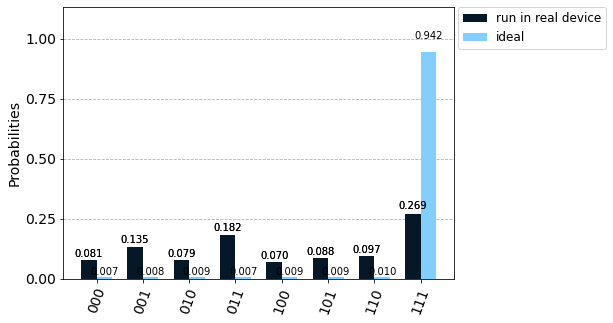

In [29]:
plot_histogram([counts_run, counts_sim ], legend=[ 'run in real device', 'ideal'], color=['#061727','#82cfff'])

Como podemos ver pelo gráfico, o nosso estado marcado é o que se encontra com maior probabilidade.

# IGNIS <a id ='ignis'></a>

In [30]:
# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

In [31]:
qr = QuantumRegister(x)
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2], qr=qr, circlabel='mcal')
state_labels

['000', '001', '010', '011', '100', '101', '110', '111']

In [33]:
job_ignis = execute(meas_calibs, backend=backend_device, shots=shots)

jobID_run_ignis = job_ignis.job_id()

print('JOB ID: {}'.format(jobID_run_ignis))

job_get=backend_device.retrieve_job(jobID_run_ignis)

cal_results = job_get.result()

JOB ID: 60bd5662917aa050fd9b8133


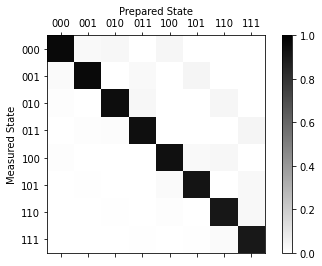

In [34]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

# Plot the calibration matrix
meas_fitter.plot_calibration()

In [35]:
# What is the measurement fidelity?
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.932861


In [36]:
# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(result_r)
mitigated_counts = mitigated_results.get_counts()

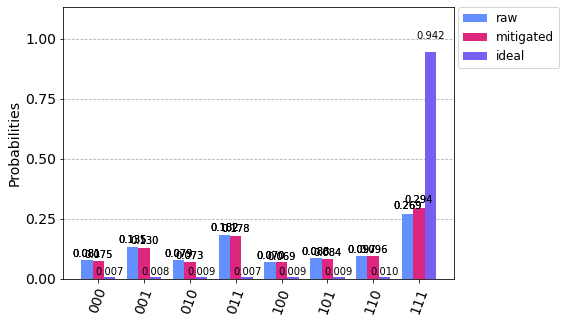

In [37]:
plot_histogram([counts_run, mitigated_counts, counts_sim], legend=['raw', 'mitigated', 'ideal'])

Como podemos verificar, a mitigação de erros foi capaz de aumentar ligeiramente a probabilidade de ocorrência no nosso estado marcado.